# Preliminary EDA for AMES Iowa Housing Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
housing = pd.read_csv('./data/Ames_Housing_Price_Data.csv')
housing.rename(columns = {'PID':'MapRefNo'}, inplace = True)
housing.shape

(2580, 82)

In [4]:
res = pd.read_csv('./data/Ames_Real_Estate_Data.csv')

C:\Users\robla\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
dd = pd.read_excel('./data/Tbl_DataExportSpec.xls')
dd.shape

(100, 7)

In [112]:
#res.head(1)

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**Note: res columns (36,40,81,87) have mixed data types**

In [113]:
#housing.head(1)

### Data Dictionary for Housing Data

In [382]:
housing_dict = pd.read_csv('./data/data_description.txt',
                   sep="\n|:",
                   header=None,
                   engine='python')

In [383]:
housing_dict.columns = ['var','descr']

In [384]:
#housing_dict.head(20)

In [385]:
new_housing_dict = housing_dict.loc[~housing_dict['descr'].isnull()]

In [386]:
new_housing_dict.loc[0:,'index_'] = new_housing_dict.index

In [387]:
new_housing_dict

,var,descr,index_
0,MSSubClass,Identifies the type of dwelling involved in t...,0
17,MSZoning,Identifies the general zoning classification ...,17
26,LotFrontage,Linear feet of street connected to property,26
27,LotArea,Lot size in square feet,27
28,Street,Type of road access to property,28
31,Alley,Type of alley access to property,31
35,LotShape,General shape of property,35
40,LandContour,Flatness of the property,40
45,Utilities,Type of utilities available,45
50,LotConfig,Lot configuration,50


In [388]:
idx = new_housing_dict['index_'].to_numpy()
i = 0
indx_outcomes = []
while (i < len(idx)-1):
    indx_outcomes.append(np.arange(idx[i]+1,idx[i+1]))
    i += 1

In [389]:
associated_outcomes = []
for j in indx_outcomes:
    associated_outcomes.append(housing_dict[['var']].loc[j].to_numpy())
associated_outcomes.append(np.array([]))
#len(associated_outcomes)

In [390]:
#len(new_housing_dict)

In [391]:
new_housing_dict.loc[0:,'associated_outcomes'] = associated_outcomes

In [392]:
new_housing_dict = new_housing_dict.reset_index()
new_housing_dict = new_housing_dict.drop(['index','index_'], axis = 1)

In [413]:
def type_(x):
    
    if len(x) == 0:
        t = 'Numerical'
    elif len(x) == 2:
        t = 'Binary Categorical'
    else:
        t = 'Categorical'
        
    return t
    
    
types = [type_(elem) for elem in new_housing_dict['associated_outcomes']]

new_housing_dict.loc[0:,'Variable Type'] = types

In [414]:
new_housing_dict

,var,descr,associated_outcomes,Variable Type
0,MSSubClass,Identifies the type of dwelling involved in t...,"[[20 1-STORY 1946 & NEWER ALL STYLES], [30 ...",Categorical
1,MSZoning,Identifies the general zoning classification ...,"[[A Agriculture], [C Commercial], [F...",Categorical
2,LotFrontage,Linear feet of street connected to property,[],Numerical
3,LotArea,Lot size in square feet,[],Numerical
4,Street,Type of road access to property,"[[Grvl Gravel], [Pave Paved]]",Binary Categorical
5,Alley,Type of alley access to property,"[[Grvl Gravel], [Pave Paved], [NA No a...",Categorical
6,LotShape,General shape of property,"[[Reg Regular], [IR1 Slightly irregular]...",Categorical
7,LandContour,Flatness of the property,"[[Lvl Near Flat/Level], [Bnk Banked - Qu...",Categorical
8,Utilities,Type of utilities available,"[[AllPub All public Utilities (E,G,W,& S)], [N...",Categorical
9,LotConfig,Lot configuration,"[[Inside Inside lot], [Corner Corner lot], [Cu...",Categorical


In [418]:
new_housing_dict.columns

Index(['var', 'descr', 'associated_outcomes', 'Variable Type'], dtype='object')

In [417]:
new_housing_dict.loc[new_housing_dict['var'].__contains__('pool')]

KeyError: False

### Data Dictionary for Real Estate Data

In [46]:
#print(dd['Field Name'].to_numpy())
#print(len(dd['Field Name'].to_numpy()))

# Merging housing and real estate datasets

In [315]:
dd.sort_values(by = 'Field Name').head()

,Field Number,Field Name,Field Start Position,Field Length,Data Type,Description,Notes
59,60,AcreGr,936,22,Double,"Acres, Gross",NaN
60,61,AcreNt_S,958,22,Double,"Acres, Net -- Assessor Year",NaN
57,58,AcreX_S1,892,22,Double,"Acres, Exemption 1 -- Assessor Year",NaN
58,59,AcreX_S2,914,22,Double,"Acres, Exemption 2 -- Assessor Year",NaN
63,64,BldgNo_S,998,6,Integer,Number of Buildings -- Assessor Year,Not on residential parcels


In [144]:
Kres = ['MapRefNo','SchD_S','TxD_S','Rcrd_Yr','Rcrd_Mo','LndAc_S','ImpAc_S', #res variables to keep
        'OthAc_S','TtlVal_AsrYr','ValType','TxNet','TxGross',
        'AcreGr','AcreNt_S','LotArea','YrBuilt','HouseStyle',
        'Foundation','RoofMatl','Ext1','Ext2','MasVnrType',
       'Heating','Central Air','GLA','TtlBsmtSF',
       'TotRmsAbvGrd','Fireplaces','PoolArea','GarageType',
       'GarYrBlt','Cars','SalePrice','SaleType',
       'SaleCond','PA-Nmbr','PA-PreD','PA-Strt','PA-StSfx',
       'PA-PostD','PA-UnTyp','PA-UntNo','Date','Source','NmbrBRs']
idx = [list(res.columns).index(i) for i in Kres if i in res.columns]

res_truncated = res.iloc[:,idx]

In [145]:
len(res_truncated.columns) == len(idx)

True

In [159]:
hres = pd.merge(housing,res_truncated,how = 'inner', on = 'MapRefNo')
hres = hres.drop('Unnamed: 0',axis = 1)

In [160]:
hres.head()

,MapRefNo,GrLivArea,SalePrice_x,MSSubClass,MSZoning,LotFrontage,LotArea_x,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle_x,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl_x,Exterior1st,Exterior2nd,MasVnrType_x,MasVnrArea,ExterQual,ExterCond,Foundation_x,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating_x,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd_x,Functional,Fireplaces_x,FireplaceQu,GarageType_x,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea_x,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType_x,SaleCondition,SchD_S,TxD_S,Rcrd_Yr,Rcrd_Mo,LndAc_S,ImpAc_S,OthAc_S,TtlVal_AsrYr,ValType,AcreGr,AcreNt_S,LotArea_y,YrBuilt,HouseStyle_y,Foundation_y,RoofMatl_y,Ext1,Ext2,MasVnrType_y,Heating_y,Central Air,GLA,TtlBsmtSF,TotRmsAbvGrd_y,Fireplaces_y,PoolArea_y,GarageType_y,GarYrBlt,Cars,SalePrice_y,SaleType_y,SaleCond,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal,1,1,2017.0,2.0,37300,0,111700,149000,F,0.0,0.0,7890.0,1939.0,1-Story,C'Block,CompShg,Wd Sdng,Wd Sdng,None,GasFWA,Yes,856.0,856.0,4.0,1.0,0.0,Detachd,1939.0,2.0,155000.0,WRDConv,Normal,436,NaN,HAYWARD,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,1,1,2020.0,1.0,43500,0,130600,174100,F,0.0,0.0,4235.0,1984.0,1-Story,C'Block,CompShg,HdBoard,HdBoard,BrkFace,GasFWA,Yes,1049.0,1049.0,5.0,0.0,0.0,Attachd,1984.0,1.0,174400.0,WRDConv,Normal,3416,NaN,WEST,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal,1,1,2020.0,1.0,43500,0,130600,174100,F,0.0,0.0,4235.0,1984.0,1-Story,C'Block,CompShg,HdBoard,HdBoard,BrkFace,GasFWA,Yes,1049.0,1049.0,5.0,0.0,0.0,Attachd,1984.0,1.0,170000.0,WRDConv,Normal,3416,NaN,WEST,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,1,1,2016.0,4.0,41100,0,123200,164300,F,0.0,0.0,6060.0,1930.0,1-Story,Brk/Til,CompShg,MetalSd,MetalSd,None,GasFWA,Yes,1001.0,837.0,5.0,0.0,0.0,Detachd,1930.0,1.0,NaN,NaN,NaN,320,S,2ND,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,

In [316]:
#pd.DataFrame({'vars':hres.columns}).sort_values(by = 'vars')

In [176]:
pd.DataFrame(np.unique(res['YrSold_YYYY'].to_numpy())).sort_values(by = 0).head()

,0
0,2017.0
1,2018.0
2,2019.0
3,2020.0
4,NaN


In [45]:
pd.DataFrame(np.unique(hres['YrSold'].to_numpy())).sort_values(by = 0)

,0
0,2006
1,2007
2,2008
3,2009
4,2010


**Real estate data is from recent years (2017-2020),
Housing data is from 2006-2010**

# Investigating Housing Dataset

In [167]:
print(housing.columns.to_numpy())
print(len(housing.columns))

['Unnamed: 0' 'MapRefNo' 'GrLivArea' 'SalePrice' 'MSSubClass' 'MSZoning'
 'LotFrontage' 'LotArea' 'Street' 'Alley' 'LotShape' 'LandContour'
 'Utilities' 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1'
 'Condition2' 'BldgType' 'HouseStyle' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'MasVnrArea' 'ExterQual' 'ExterCond'
 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1'
 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF' 'TotalBsmtSF'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF' '2ndFlrSF'
 'LowQualFinSF' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual' 'TotRmsAbvGrd' 'Functional'
 'Fireplaces' 'FireplaceQu' 'GarageType' 'GarageYrBlt' 'GarageFinish'
 'GarageCars' 'GarageArea' 'GarageQual' 'GarageCond' 'PavedDrive'
 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch' 'ScreenPorch'
 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature' 'Mis

In [168]:
correlation_matrix = pd.DataFrame(housing.corr())

In [169]:
print(correlation_matrix.columns)
print(len(correlation_matrix.columns))

Index(['Unnamed: 0', 'MapRefNo', 'GrLivArea', 'SalePrice', 'MSSubClass',
       'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
39


In [170]:
fig = px.imshow(correlation_matrix, width = 800, height = 800, color_continuous_scale = 'reds',title = 'Housing Heatmap')
fig.show()

In [171]:
#?px.imshow

In [172]:
fig = px.imshow(correlation_matrix[['SalePrice']].sort_values(by = 'SalePrice', ascending = True).T,
                width = 1000, height = 400, aspect = 1,
                color_continuous_scale = 'spectral',
                title = 'Sale Price Heatmap')
fig.show()

In [173]:
sale_cors = correlation_matrix[['SalePrice']].sort_values(by = 'SalePrice', ascending = True)

In [174]:
SalesPrice_cVars = correlation_matrix[['SalePrice']].sort_values(by = 'SalePrice', ascending = True).index

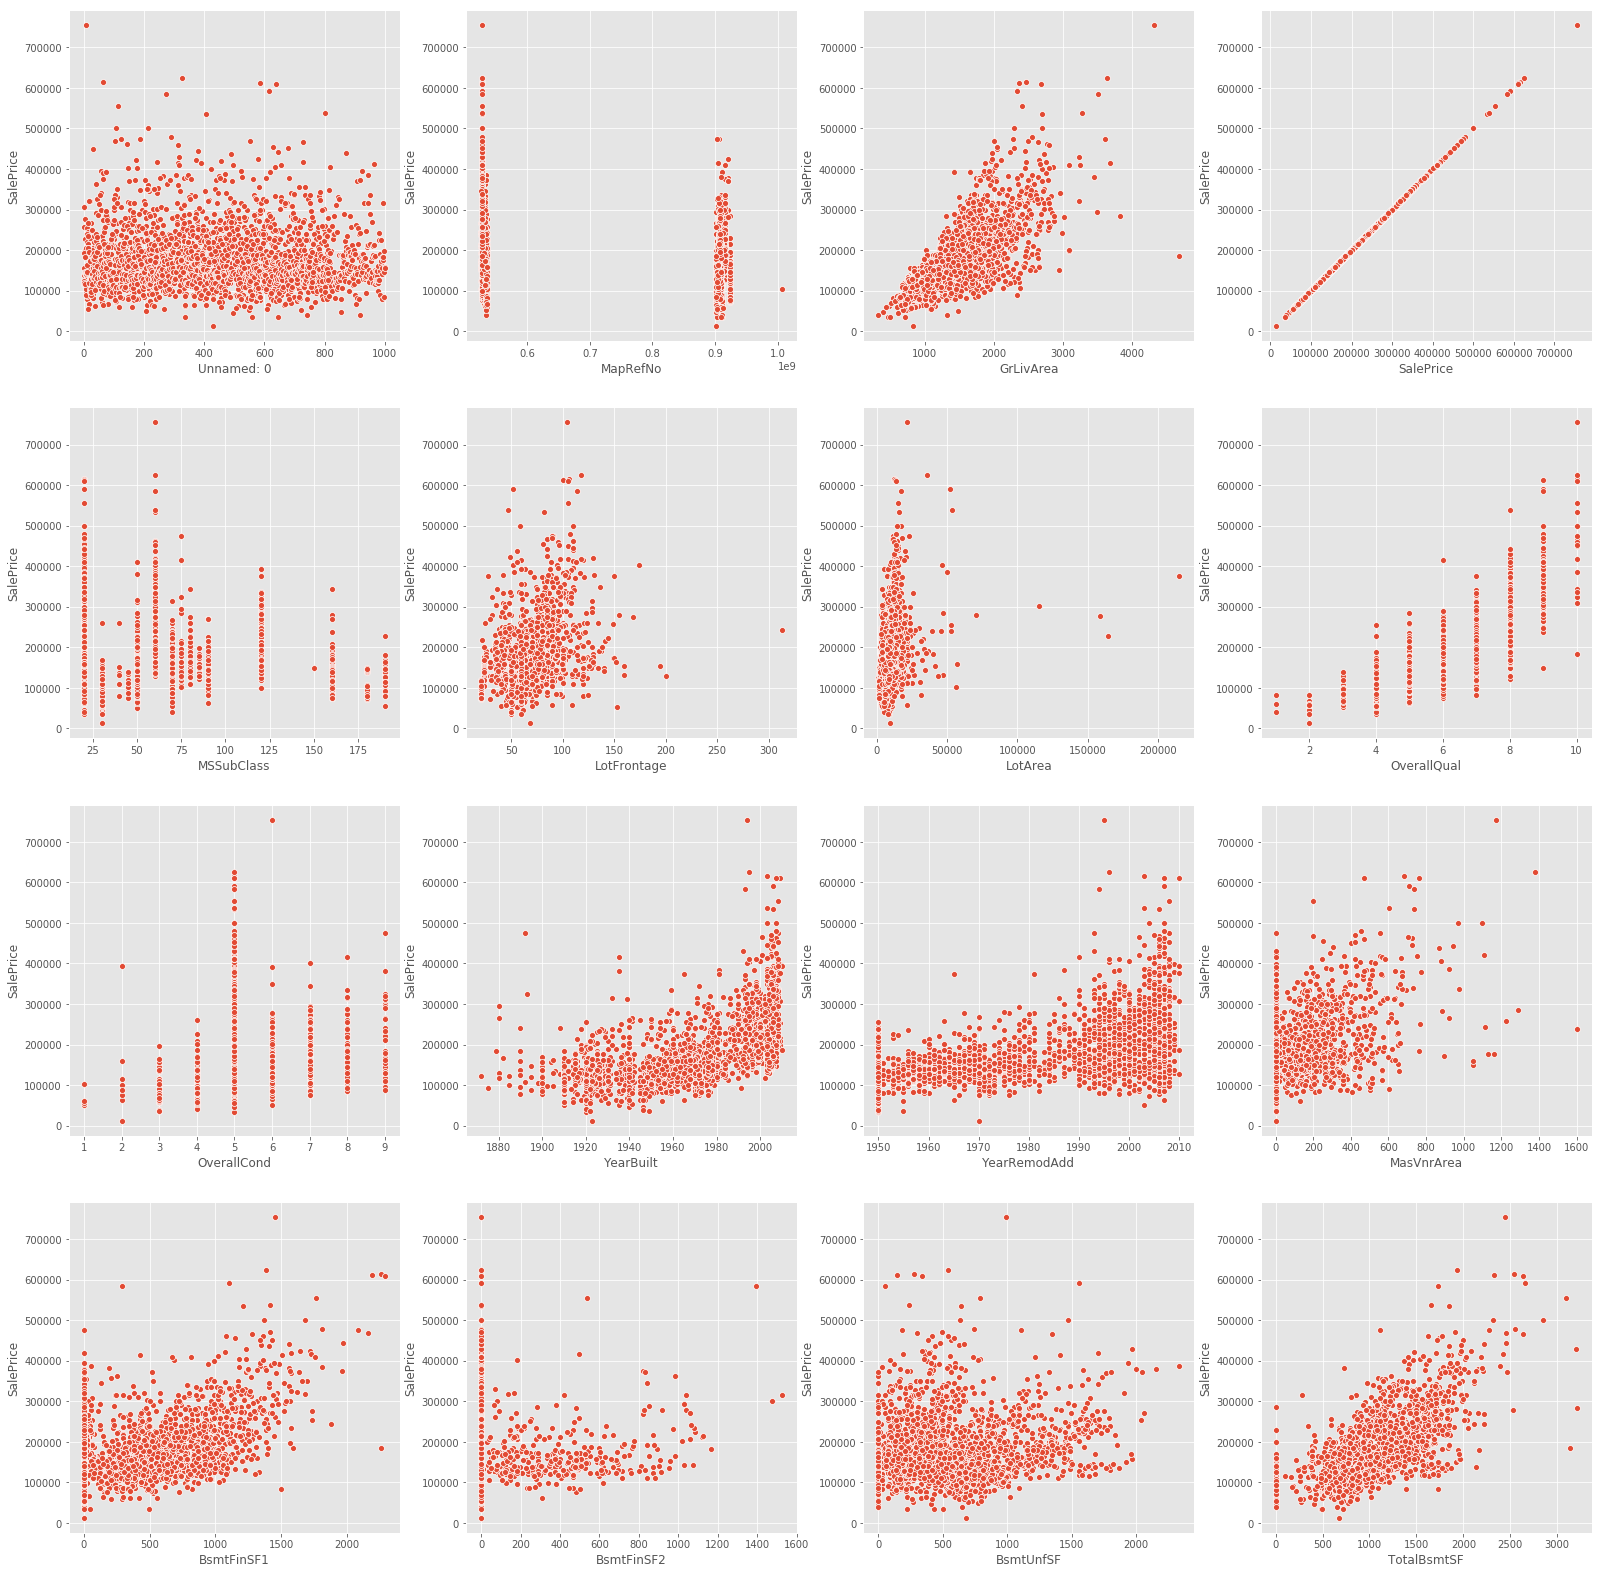

In [175]:
fig, axs = plt.subplots(4, 4, figsize=(18, 18))
plt.subplots_adjust(right=1.3, top=1.3)
axs = axs.flatten()
for i, col in enumerate(list(correlation_matrix.index[:16])):
    sns.scatterplot(y='SalePrice', x=col, ax=axs[i], data=housing)
    axs[i].set_ylabel('SalePrice')
    axs[i].set_xlabel(col)
plt.show()